In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# get titanic & test csv files as a DataFrame
train = pd.read_csv("Datasets/train.csv")
print(train.shape)

(891, 12)


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=["Train"])
NAs

,Train
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
NAs[NAs.sum(axis=1) > 0]

,Train
Age,177
Cabin,687
Embarked,2


In [9]:
train.pop("PassengerId")
train.pop("Cabin")
train.pop("Name")
train.pop("Ticket")

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [10]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Filling missing Age values with mean
train["Age"] = train["Age"].fillna(train["Age"].mean())

In [13]:
train["Embarked"].mode()

0    S
dtype: object

In [14]:
# Filling missing Embarked values with most common value
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

In [15]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
train["Pclass"] = train["Pclass"].apply(str)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [19]:
# Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == "object"].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [20]:
labels = train.pop("Survived")

In [21]:
train

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = rf.predict(x_test)

In [25]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8466508438818566

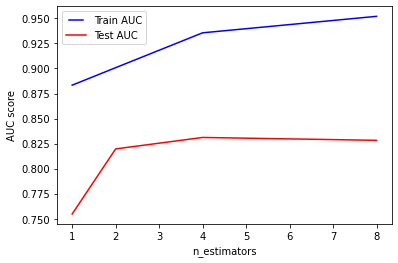

array([0.26405851, 0.05869816, 0.03817812, 0.24908863, 0.03778448,
       0.02054015, 0.02351059, 0.15498452, 0.12680165, 0.00849201,
       0.00891751, 0.00894567])

In [27]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs= -1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

rf.feature_importances_

Now we can decide that how many number of estimators are giving us better results from above plot

# Random Forest Hyperparameter Tuning in Python

Sci-kit aka Sklearn is a Machine Learning library that supports many Machine Learning Algorithms, Pre-processing Techniques, Performance Evaluation metrics, and many other algorithms. Ensemble Techniques are considered to give a good accuracy score among all the Machine Learning Algorithms. Since Machine Learning are classified into Supervised and Unsupervised Learning, we have two types of approach in Supervised Learning that is Regression and classification. Talking of Classification, let us consider one of the ensembles technique i.e., the Random Forest algorithm. While building a Classification model, we always think about what value should be assigned to the Hyperparameters. Hyperparameters are similar to parameters but the only difference is there is no one specific value to these Hyperparameters.

### Since we are talking about Random Forest Hyperparameters, let us see what different Hyperparameters can be Tuned. 

# 1. n_estimators

Random Forest is nothing but a set of trees. It is an extended version of the Decision Tree in a very optimized way. One issue here might arise is how many trees need to be created. n_estimator is the hyperparameter that defines the number of trees to be used in the model. The tree can also be understood as the sub-divisions. 

By default: n_estimators=100

# 2. max_features

In order to train the Machine learning model, the given dataset should contain multiple features/variables to predict the label/target. Max_features limits a count to select the maximum features in each tree. 

By default: max_features= {“sqrt”, “log2”, None}, int or float, default=”sqrt” # if None gives error try using "Auto"

If int, then consider max_features features at each split.

If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.

      i.e max of 1 or the int(max_features * n_features_in_) whwere max_feature is the float value given and n_features are total features available in the data

If “sqrt”, then max_features=sqrt(n_features).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features.

# 3. max_depth

A tree is incomplete without a split or child node. max_depth determines the maximum number of splits each tree can take. If the max_depth is too low, the model will be trained less and have a high bias, leading the model to underfit. In the same way, if the max_depth is high, the model learns too much and leads to high variance, leading the model to overfit.

By default: max_depth=None i.e. If None, then nodes are expanded until all leaves are pure 

# 4. max_leaf_nodes

We have a tree and know what max_depth is used for. Talking of a Tree, each tree is used to split into multiple nodes. But how many divisions of nodes should be done is specified by max_leaf_nodes. max_leaf_nodes restricts the growth of each tree. 

Simply put : Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. default = None

By default: max_leaf_nodes = None;  (takes an unlimited number of nodes)

# 5. max_sample

Apart from the features, we have a large set of training datasets. max_sample determines how much of the dataset is given to each individual tree. 

i.e the number of samples to draw from X to train each base estimator.

By default: max_sample = None;

# 6. min_sample_split

Since ensemble algorithms are weak learners and are derived from strong learners, Random Forest which is a Weak Learner depends on Decision Tree decisions.  min_sample_split determines the minimum number of decision tree observations in any given node in order to split. 

i.e. The minimum number of samples required to split an internal node. default = 2 (this means every node has 2 subnodes)

### Random Forest Hyperparameter Tuning in Python using Sklearn

Sklearn supports Hyperparameter Tuning algorithms that help to fine-tune the Machine learning models. Here, we shall use two different Hyperparameter Tuning i.e., GridSearchCV and RandomizedSearchCV.

### Parameters Vs Hyperparameters :

Parameters in a machine learning model refer to the variables that an algorithm itself produces (such as a coefficient) to produce a prediction. These parameters are not set or hard-coded and depend on the training data that is passed into your model. Because of this, they’re likely to change when your data changes.

On the other hand, hyper-parameters are variables that you specify while building a machine-learning model. This means that it’s the user that defines the hyper-parameters while building the model. For example, in a k-nearest neighbour algorithm, the hyper-parameters can refer the value for k or the type of distance measurement used.

In short, hyper-parameters control the learning process, while parameters are learned.

This is where the “art” of machine-learning comes into play. The choice of your hyper-parameters will have significant impact on the success of your model. Being able to tune your model is finding what the best hyper-parameters are.

Hyper-parameter tuning refers to the process of find hyper-parameters that yield the best result. This, of course, sounds a lot easier than it actually is. Finding the best hyper-parameters can be an elusive art, especially given that it depends largely on your training and testing data.

As your data evolves, the hyper-parameters that were once high performing may not longer perform well. Keeping track of the success of your model is critical to ensure it grows with the data.

One way to tune your hyper-parameters is to use a grid search. This is probably the simplest method as well as the most crude. In a grid search, you try a grid of hyper-parameters and evaluate the performance of each combination of hyper-parameters.

## How does Sklearn’s GridSearchCV Work?
The GridSearchCV class in Sklearn serves a dual purpose in tuning your model. The class allows you to:

1. Apply a grid search to an array of hyper-parameters, and
2. Cross-validate your model using k-fold cross validation

Depending upon the algo you are using your hyperparameters will change be it KNN or RF or any other

## Difference between GridSearchCV & RandomizedSearchCV :
    
As per my understanding from the documentation:

### GridSearchCV

Creates a grid over the search space and evaluates the model for all of the possible hyperparameters in the space. Good in the sense that it is simple and exhaustive. On the minus side, it may be prohibitively expensive in computation time if the search space is large (e.g. very many hyper parameters).

All combinations combined is often refered to as the parameter space. Using GridSearchCV can take a lot of computations since it has to train your model for each combination, often including cross validation. So for each combination it would train on k folds. This can often explode your computation time tremendously. Benefit however is that if you run it on a broad parameter space you will get the "best" parameter settings possible.


###  RandomizedSearchCV

This uses a random set of hyperparameters. Useful when there are many hyperparameters, so the search space is large. It can be used if you have a prior belief on what the hyperparameters should be.

 RandomizedSearchCV now takes your parameter space and picks randomly a predefined number of times and runs the model that many times. You can even give it continuous distributions for parameters to randomly pick values from. That way you have a computation optimized way of experimenting on random parameter settings. This is usefull if you already have a general idea on which hyperparameters you want to tune but are not yet quite sure which values to use.

Import the required modules that are needed to fine-tune the Hyperparameters in Random Forest.

In [28]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [31]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None], #If None gives error then try giving "Auto"
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [32]:
print(y_train.shape)
print(x_train.shape)

(668,)
(668, 12)


# Hyperparameter Tuning- GridSearchCV

First, let’s use GridSearchCV to obtain the best parameters for the model. For that, we will pass RandomFoestClassifier() instance to the model and then fit the GridSearchCV using the training data to find the best parameters.

In [33]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)


#### Now we will update obtained parameters into our model and rebuild it

In [41]:
model_grid = RandomForestClassifier(max_depth=6,
                                    max_features=None,
                                    max_leaf_nodes=9,
                                    n_estimators=150)
model_grid.fit(x_train,  y_train)
y_pred_grid = model_grid.predict(x_test)

In [42]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_grid)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [43]:
roc_auc

0.8219497187060477

In [37]:
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid)
random_search.fit(x_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)


In [38]:
model_random = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9, n_estimators=50)
model_random.fit(x_train, y_train)
y_pred_rand = model_random.predict(x_test)

In [39]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rand)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [40]:
roc_auc

0.8248066104078763

## WARNING: 

This will not always be the case. Like everything else in data science, it is entirely dependent on the data and the problem. If your results worsen, try running the search again with different values.

## Results

After spending hours on cleaning the data to fit your model and tuning the parameters using GridSearchCV or RandomizedSearchCV , you may come to find that all that hypertuning didn’t improve your model performance by very much. Was it worth it? Maybe. It all depends on how much time you spent on tuning your model. If you took a whole day to test out parameters and only improved your model accuracy by 0.5%, perhaps that wasn’t the best use of your time. I am definitely, absolutely not speaking from personal (read: painful) experience.

## The Bottom Line

GridSearchCV or RandomizedSearchCV is a useful tool to fine tune the parameters of your model. Depending on the estimator being used, there may be even more hyperparameters that need tuning than the ones in above exaples. Do not expect the search to improve your results greatly. It may be more efficient to go back and explore your selected features or find other relationships between features to improve your model performance.